In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# 读取数据
data = loadmat('ex3data1.mat')
x = data['X']
y = data['y']
m = len(x)

(200, 200)


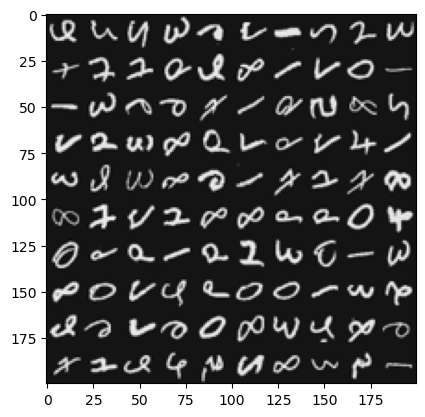

In [75]:
# 绘图
random_selected_index = np.random.choice(len(x), 100)
need_show_data = x[random_selected_index]
need_show_img = None

for i in range(10):
    tmp_array = need_show_data[i * 10].reshape(20, 20)
    for j in range(1, 10):
        tmp_array = np.concatenate((tmp_array, need_show_data[i * 10 + j].reshape(20, 20)), axis=1)
    need_show_img = tmp_array if need_show_img is None else np.concatenate((need_show_img, tmp_array), axis=0)
print(need_show_img.shape)
plt.imshow(need_show_img, cmap='gray')
plt.show()

In [76]:
# sigmoid函数
def sigmoid(z_param):
    return 1 / (1 + np.exp(-z_param))


def h_fun(theta_param, x_param):
    return sigmoid(x_param @ theta_param.T)

In [77]:
# 读取theta
theta_data = loadmat('ex3weights.mat')
theta1 = theta_data['Theta1']
theta2 = theta_data['Theta2']
theta1.shape, theta2.shape

((25, 401), (10, 26))

In [78]:
# 前向传播预测
def predict(theta1_param, theta2_param, x_param):
    a1 = np.insert(x_param, 0, values=np.ones(m), axis=1)
    z2 = a1 @ theta1_param.T
    a2 = np.insert(sigmoid(z2), 0, values=np.ones(m), axis=1)
    z3 = a2 @ theta2_param.T
    a3 = sigmoid(z3)
    return np.argmax(a3, axis=1) + 1


y_pred = predict(theta1, theta2, x)

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

accuracy = np.mean(y_pred.reshape(y.shape[0], 1) == y)
print('accuracy = {0}%'.format(accuracy * 100))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       500
           2       0.98      0.97      0.98       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.97      0.98      0.98       500
           6       0.98      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

accuracy = 97.52%
